In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import joblib

In [2]:
df = joblib.load('../data/processed/data_1003.jblb')['df']
df['x_diff'] = df['receiver_x'] - df['thrower_x']
df['y_diff'] = df['receiver_y'] - df['thrower_y']
df['throw_angle'] = np.arctan2(df['y_diff'], df['x_diff'])
df['throw_distance'] = np.sqrt(df['x_diff']**2 + df['y_diff']**2)

In [44]:
grouped = df.groupby(['gameID', 'game_quarter', 'quarter_point']).possession_num.nunique()
filtered_groups = grouped[grouped == 1].index
sorted_groups = filtered_groups.sort_values()
group_key = sorted_groups[10]
result = df[(df['gameID'] == group_key[0]) & 
            (df['game_quarter'] == group_key[1]) & 
            (df['quarter_point'] == group_key[2])]


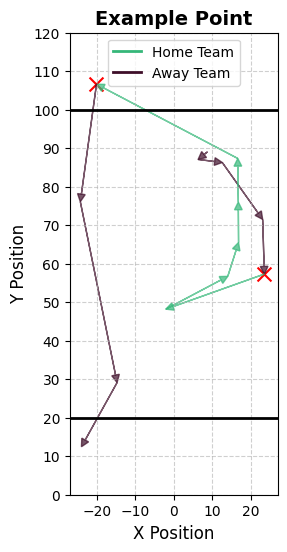

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))
arrows = []
texts = []

grouped = df.groupby(['gameID', 'game_quarter', 'quarter_point']).possession_num.nunique()
filtered_groups = grouped[grouped == 2].index
sorted_groups = filtered_groups.sort_values()
group_key = sorted_groups[23]
result = df[(df['gameID'] == group_key[0]) & 
            (df['game_quarter'] == group_key[1]) & 
            (df['quarter_point'] == group_key[2])]
next_throw = None
color1='#35b779'
color2='#3e0e29'
for _, row in result.sort_index().iterrows():
    thrower_x = row['thrower_x']
    thrower_y = row['thrower_y']
    receiver_x = row['receiver_x']
    receiver_y = row['receiver_y']
    color = color1
    if row.is_home_team:
        thrower_x = -thrower_x
        thrower_y = 120 - thrower_y
        receiver_x = -receiver_x
        receiver_y = 120 - receiver_y
        color = color2
    if next_throw is not None:
        thrower_x, thrower_y = next_throw 
    dx = receiver_x - thrower_x
    dy = receiver_y - thrower_y
    if row.completion == 0:
        ax.scatter(receiver_x, receiver_y, color='red', marker='x', s=100, label="Incomplete")
        next_throw = (receiver_x, receiver_y)
    else:
        next_throw = None
    arr = ax.arrow(thrower_x, thrower_y, dx, dy, length_includes_head=True, head_width=2, head_length=2, fc=color, ec=color, alpha=0.7)
    arrows.append(arr)

ax.axhline(y=20, color='black', linestyle='-', linewidth=2)
ax.axhline(y=100, color='black', linestyle='-', linewidth=2)
ax.set_xlim(-27, 27)
ax.set_ylim(0, 120)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X Position', fontsize=12)
ax.set_ylabel('Y Position', fontsize=12)
ax.set_title('Example Point', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xticks(np.arange(-20, 21, 10))
ax.set_yticks(np.arange(0, 121, 10)) 
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=color1, lw=2, label="Home Team"),
    Line2D([0], [0], color=color2, lw=2, label="Away Team")
]

# Add the custom legend to the plot
ax.legend(handles=legend_elements, loc='upper center')

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
arrows = []
texts = []

grouped = df.groupby(['gameID', 'game_quarter', 'quarter_point']).possession_num.nunique()
filtered_groups = grouped[grouped == 2].index
sorted_groups = filtered_groups.sort_values()
group_key = sorted_groups[22]
result = df[(df['gameID'] == group_key[0]) & 
            (df['game_quarter'] == group_key[1]) & 
            (df['quarter_point'] == group_key[2])]
next_throw = None

for _, row in result.sort_index().iterrows():
    thrower_x = row['thrower_x']
    thrower_y = row['thrower_y']
    receiver_x = row['receiver_x']
    receiver_y = row['receiver_y']
    color = 'orange'
    if row.is_home_team:
        thrower_x = -thrower_x
        thrower_y = 120 - thrower_y
        receiver_x = -receiver_x
        receiver_y = 120 - receiver_y
        color = 'green'
    if next_throw is not None:
        thrower_x, thrower_y = next_throw
    dx = receiver_x - thrower_x
    dy = receiver_y - thrower_y
    if row.completion == 0:
        ax.scatter(receiver_x, receiver_y, color='red', marker='x', s=100, label="Incomplete")
        next_throw = (receiver_x, receiver_y)
    else:
        next_throw = None
    arr = ax.arrow(thrower_x, thrower_y, dx, dy, length_includes_head=True, head_width=2, head_length=2, fc=color, ec=color, alpha=0.7)
    arrows.append(arr)

ax.axhline(y=20, color='black', linestyle='-', linewidth=2)
ax.axhline(y=100, color='black', linestyle='-', linewidth=2)

ax.set_xlim(-27, 27)
ax.set_ylim(0, 120)

ax.set_aspect('equal', 'box')

ax.set_xlabel('X Position', fontsize=12)
ax.set_ylabel('Y Position', fontsize=12)
ax.set_title('Thrower-Receiver Interaction', fontsize=14, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.6)

handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
ax.legend(handles[:len(unique_labels)], unique_labels, loc='upper left')

plt.show()


In [240]:
result[['thrower_x', 'thrower_y', 'receiver_x', 'receiver_y', 'throw_distance', 'throw_angle', 'x_diff', 'y_diff', 'game_quarter', 'quarter_point', 'score_diff', 'times']].sort_index().round(2).to_csv('./example_point.csv', index=False)

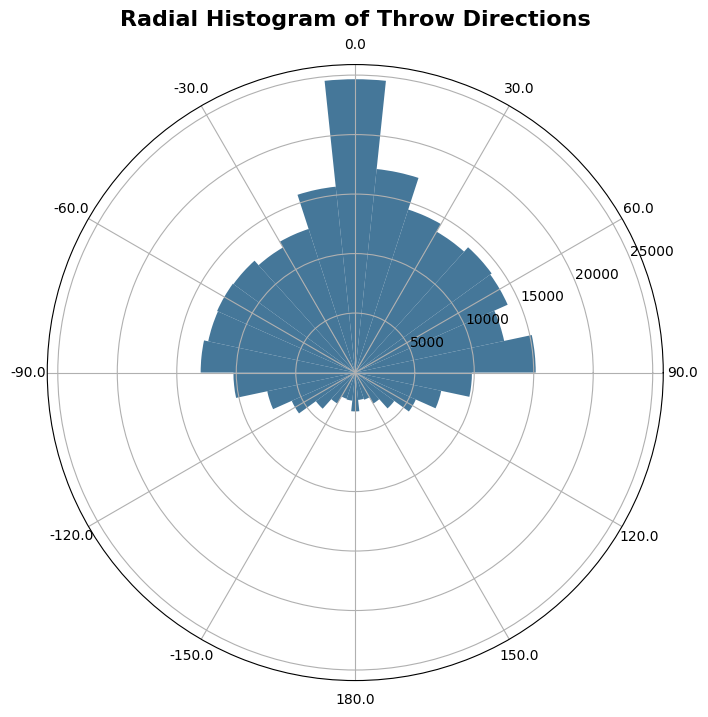

In [210]:
## Plot Radial Histogram of Directions
num_bins_angle = 30

angle_bins = np.linspace(-np.pi, np.pi, num_bins_angle + 1)
hist, _ = np.histogram(df['throw_angle'], bins=angle_bins)
bin_width = angle_bins[1] - angle_bins[0]
theta = angle_bins[:-1] + bin_width / 2

# Create a figure
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(theta, hist, width=bin_width, color='#31688e', alpha=0.9, edgecolor='none')
ax.set_title('Radial Histogram of Throw Directions', va='bottom', fontweight='bold', fontsize=16)
num_ticks = 12
shift=3
tick_labels = np.linspace(180, -180, num_ticks, endpoint=False)
tick_labels = np.concatenate([tick_labels[shift:], tick_labels[:shift]])
ax.set_xticks(np.linspace(0, 2 * np.pi, num_ticks, endpoint=False))  # Avoid including the last tick
ax.set_xticklabels(tick_labels)  # Don't include 180 in labels

plt.show()


/var/folders/r4/cqt7s71n4k18qp94swd6_njr0000gn/T/ipykernel_22621/1973249808.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(theta, r, colors.T, cmap='viridis_r', shading='auto')


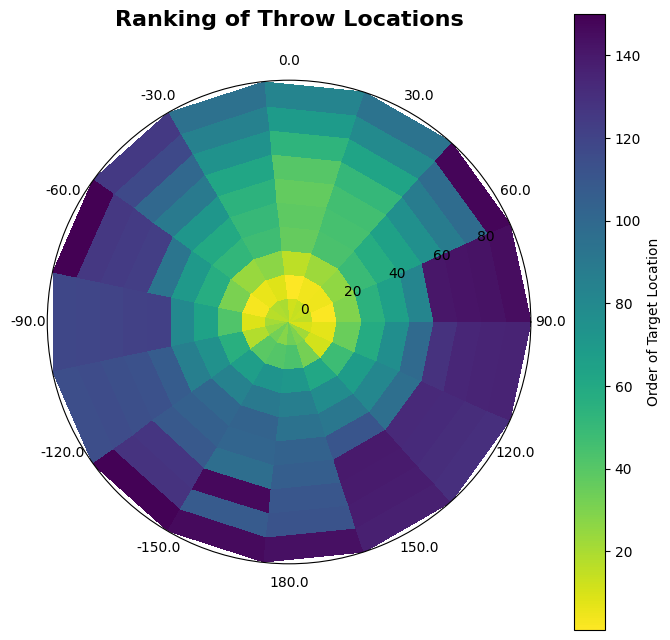

In [229]:
## Plot Radial Histogram of Distances
num_bins_angle = 15
num_bins_distance = 10
angle_bins = np.linspace(-np.pi, np.pi, num_bins_angle + 1)  # Bins for angles
distance_bins = np.linspace(0, df['throw_distance'].max(), num_bins_distance + 1)  # Bins for distances

# calculate bin values
hist, _, _ = np.histogram2d(df['throw_angle'], df['throw_distance'], bins=[angle_bins, distance_bins])
throw_order = np.argsort(hist, axis=None)[::-1]
colors = np.zeros_like(hist.flatten())
for idx, order in enumerate(throw_order):
    colors[order] = idx + 1 
colors = colors.reshape(hist.shape)

# plot figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
theta, r = np.meshgrid(angle_bins[:-1], distance_bins[:-1]) 
c = ax.pcolormesh(theta, r, colors.T, cmap='viridis_r', shading='auto')
cbar = plt.colorbar(c, ax=ax, pad=0.07)
cbar.set_label('Order of Target Location')
ax.set_title('Ranking of Throw Locations', pad=20, fontweight='bold', fontsize=16)
ax.set_xticks(np.linspace(0, 2 * np.pi, num_ticks, endpoint=False))  # Avoid including the last tick
ax.set_xticklabels(tick_labels)  # Don't include 180 in labels


plt.show()

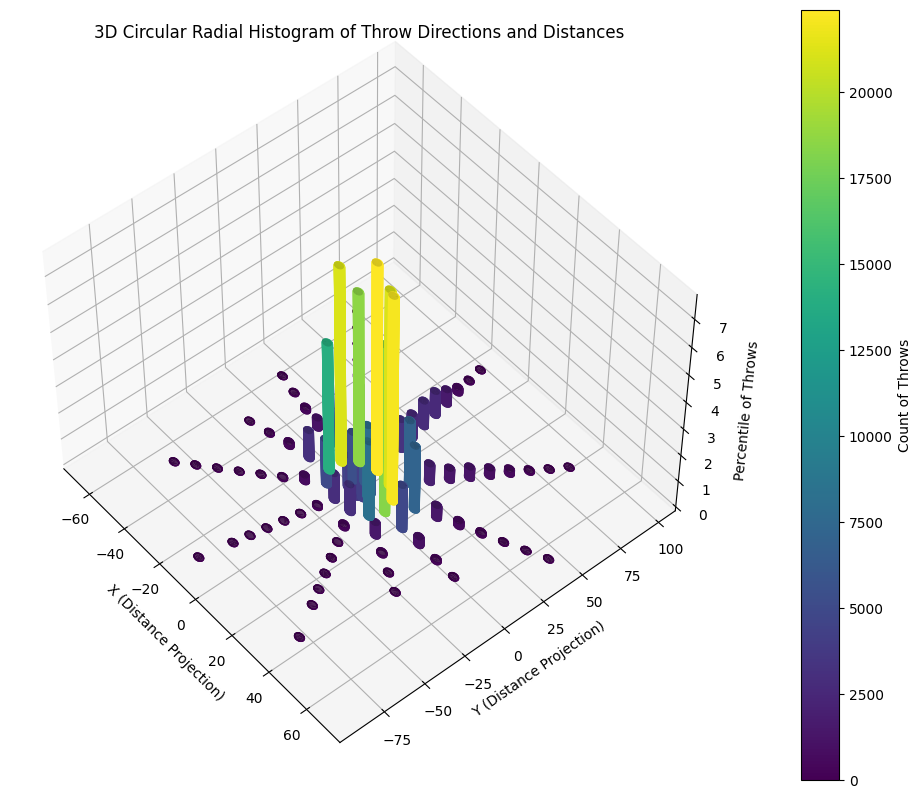

In [5]:
## 3D Radial Histogram of Distance and Direction

def draw_cylinder(ax, x_center, y_center, radius, height, color='b', alpha=1):
    num_points = 30
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = x_center + radius * np.cos(theta)
    y = y_center + radius * np.sin(theta)
    z = np.zeros(num_points)
    
    ax.plot_trisurf(x, y, z, color=color, alpha=alpha)

    for i in range(len(x) - 1):
        verts = [
            [(x[i], y[i], 0), (x[i + 1], y[i + 1], 0), 
             (x[i + 1], y[i + 1], height), (x[i], y[i], height)]
        ]
        ax.add_collection3d(Poly3DCollection(verts, color=color, alpha=alpha))
    
    z_top = np.ones(num_points) * height
    ax.plot_trisurf(x, y, z_top, color=color, alpha=alpha)


num_bins_angle = 11  # 10 bins for angles
num_bins_distance = 11  # 10 bins for distances
angle_bins = np.linspace(-np.pi, np.pi, num_bins_angle + 1)  # Bins for angles
distance_bins = np.linspace(0, df['throw_distance'].max(), num_bins_distance + 1)  # Bins for distances
hist, _, _ = np.histogram2d(df['throw_angle'], df['throw_distance'], bins=[angle_bins, distance_bins])
total_throws = np.sum(hist)
percentile_heights = (hist / total_throws) * 100  # Convert to percentage


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
theta = angle_bins[:-1] + (angle_bins[1] - angle_bins[0]) / 2  # Midpoints for angles
r = distance_bins[:-1] + (distance_bins[1] - distance_bins[0]) / 2  # Midpoints for distances
norm = plt.Normalize(vmin=0, vmax=np.max(hist))  # Normalization for color mapping
cmap = plt.cm.viridis  # Colormap
for i in range(num_bins_angle):
    for j in range(num_bins_distance):
        if hist[i, j] > 0:  # Only plot bars with counts
            # Calculate the center coordinates and height
            x_center = r[j] * np.cos(theta[i])
            y_center = r[j] * np.sin(theta[i])
            height = percentile_heights[i, j]  # Height of the cylinder corresponds to the percentile
            
            # Draw the cylinder with an increased radius
            color = cmap(norm(hist[i, j]))  # Get the color for the cylinder
            draw_cylinder(ax, x_center, y_center, radius=2, height=height, color=color, alpha=0.8)
ax.view_init(elev=50, azim=-40)  # Elevation and azimuth angles
ax.set_xlabel('X (Distance Projection)')
ax.set_ylabel('Y (Distance Projection)')
ax.set_zlabel('Percentile of Throws')
ax.set_title('3D Circular Radial Histogram of Throw Directions and Distances')

mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array([])  
cbar = plt.colorbar(mappable, ax=ax, pad=0.1)
cbar.set_label('Count of Throws')
plt.show()
